<a href="https://colab.research.google.com/github/santiagorivas0/Prediccion-de-Abandono-de-Clientes-Bancarios/blob/main/Deasfio_Evaluacion_ML_RivasQuinteros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PREDICCIÓN DEL ABANDONO DE CLIENTES BANCARIOS**

In [ ]:
#LIBRERIAS

#MANIPULACION DE DATOS, CALCULOS Y GRÁFICOS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


**IMPORTAMOS LOS DATOS**

In [ ]:
df = pd.read_csv('Abandono_Clientes_Bancarios.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**DATA WRANGLING** 

In [ ]:
df1 = df.drop(["Surname", "CustomerId","Tenure","RowNumber"], axis=1)

In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_geography = pd.get_dummies(df["Geography"], prefix="Geography")

In [ ]:
df = pd.concat([df, dummy_gender, dummy_geography], axis=1)




**MODELOS PARA DISMINUIR DIMENSIONALIDAD Y AGRUPAR**

BASE PARA MODELIZAR

In [ ]:
df3 = df[['CustomerId','CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male','Geography_France','Geography_Spain','Exited']]
df3.head()

,CustomerId,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Spain,Exited
0,15634602,619,42,0.00,1,1,1,101348.88,0,1,0,1
1,15647311,608,41,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,159660.80,3,1,0,113931.57,0,1,0,1
3,15701354,699,39,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,43,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X_num = df[['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']]

In [ ]:
X_dummy = df[['HasCrCard','IsActiveMember','Gender_Male','Geography_France','Geography_Spain']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars_std = scaler.fit_transform(X_num)

In [ ]:
df_std = pd.concat([pd.DataFrame(num_vars_std, columns=X_num.columns), X_dummy], axis=1)


In [ ]:
print(df_std.head())


   CreditScore       Age   Balance  NumOfProducts  EstimatedSalary  HasCrCard  \
0    -0.326221  0.293517 -1.225848      -0.911583         0.021886          1   
1    -0.440036  0.198164  0.117350      -0.911583         0.216534          0   
2    -1.536794  0.293517  1.333053       2.527057         0.240687          1   
3     0.501521  0.007457 -1.225848       0.807737        -0.108918          0   
4     2.063884  0.388871  0.785728      -0.911583        -0.365276          1   

   IsActiveMember  Gender_Male  Geography_France  Geography_Spain  
0               1            0                 1                0  
1               1            0                 0                1  
2               0            0                 1                0  
3               0            0                 1                0  
4               1            0                 0                1  


<ipython-input-12-805b13f9ea5e>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matriz_correlacion, dtype = np.bool))


<Axes: >

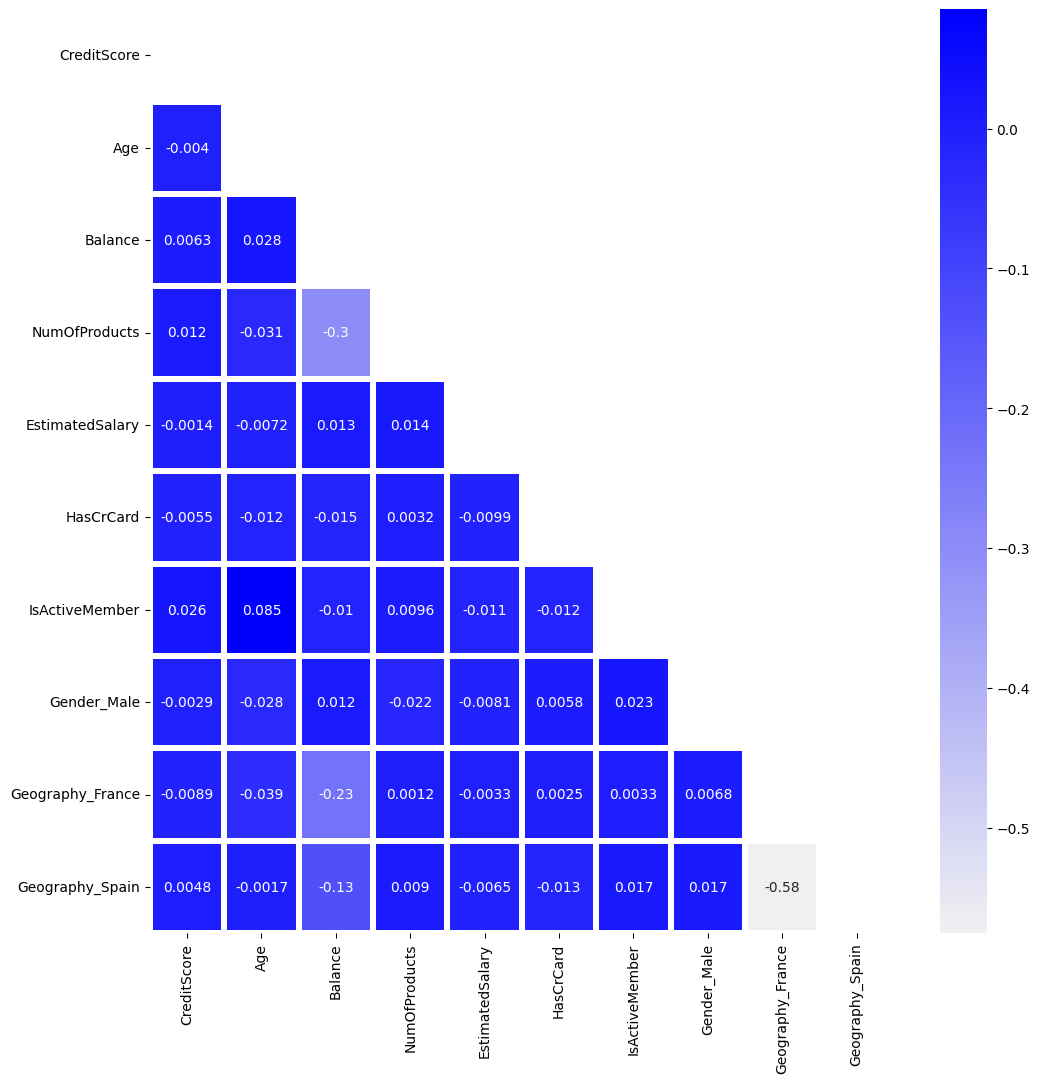

In [ ]:
import seaborn as sns

# Calcular la matriz de correlación
matriz_correlacion = pd.DataFrame(df_std).corr()

#manera de seleccionar el triangulo superior de la matriz para omitirla
mask = np.triu(np.ones_like(matriz_correlacion, dtype = np.bool))

plt.rcParams['figure.figsize'] = 12, 12
#seleccion de colores 
cmap = sns.light_palette('blue', as_cmap = True)
#mapa de calor sobre valores de heatmap
sns.heatmap(matriz_correlacion, mask = mask, cmap = cmap, annot = True, linewidth = 3)

In [ ]:
from sklearn.decomposition import PCA
#generacion PCA todas las variables
pca = PCA()
#trasnformacion
pcaData = pd.DataFrame(pca.fit_transform(df_std))

In [ ]:
#valores de lasvariables
pca.explained_variance_ratio_

array([0.21454984, 0.163972  , 0.16301948, 0.16139581, 0.11535674,
       0.0554465 , 0.04133213, 0.03923218, 0.03377887, 0.01191645])

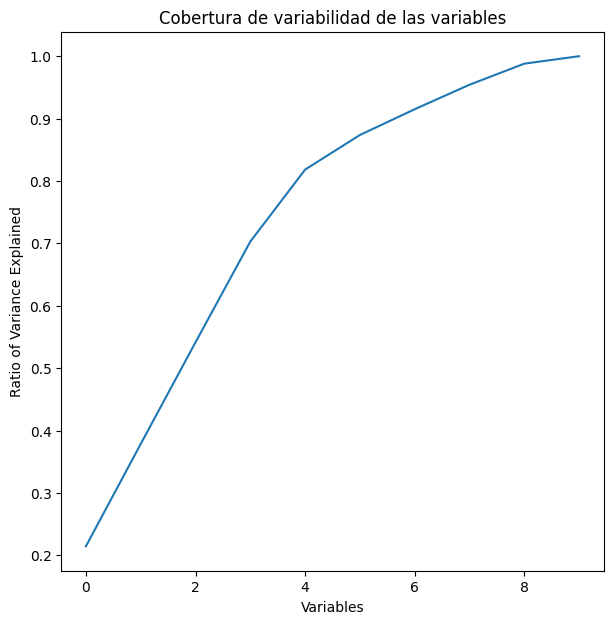

In [ ]:
plt.rcParams['figure.figsize'] = 7, 7
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Variables')
plt.ylabel('Ratio of Variance Explained')
plt.title('Cobertura de variabilidad de las variables')
plt.show()

DADO EL GRAFICO NOS QUEDAMOS CON 2 COMPONENTES DEL PCA, QUE EXPLICAN LA VARIABILIDAD DE TODO LA BASE

In [ ]:
#genero el modelo PCa con n variables(2)
pca = PCA(n_components = 4)

#entreo y trasnformo
X = pca.fit_transform(df_std)


ESTOS DOS COMPONENTES DEL PCA EXPLICAN LA VARIABILIDAD

**ANALISIS FACTORIAL**

In [ ]:
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=4, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(df_std)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 31.9 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=1603b862c9c701ca4ef3c5a03d36fb996bd48baa02adf9d03abb9dc53b42bf7c
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


FactorAnalyzer(method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={})

In [ ]:
print("Valores propios:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Varianzas especificas:")
print(fa.get_uniquenesses())
print()
print("Cargas de los factores:")
print(fa.loadings_)

Valores propios:
[1.58993349 1.34204182 1.09028772 1.02395999 1.00732754 0.99593973
 0.9857966  0.89277775 0.76648679 0.30544857]

Communalities:
[0.03841161 0.51885656 0.7115385  0.57373039 0.28925994 0.16458876
 0.57525587 0.539888   0.82608095 0.80861245]

Varianzas especificas:
[0.96158839 0.48114344 0.2884615  0.42626961 0.71074006 0.83541124
 0.42474413 0.460112   0.17391905 0.19138755]

Cargas de los factores:
[[ 0.01329685  0.02173924  0.19214141  0.02904969]
 [ 0.00659194 -0.11071309  0.66599154 -0.2510199 ]
 [ 0.06148129 -0.83952557 -0.02416774 -0.04869579]
 [ 0.03966829  0.75368282  0.00777076 -0.06370746]
 [ 0.00184063 -0.00143705 -0.18226325 -0.50599861]
 [-0.01166893  0.02575288 -0.13139055  0.38278703]
 [-0.01407781  0.04686937  0.74745951  0.11901774]
 [ 0.01593501 -0.06132888  0.030372    0.73140302]
 [-0.88888489  0.18452327 -0.01629837  0.04062186]
 [ 0.88405086  0.15884952  0.02365186  0.03569237]]


In [ ]:
pd.DataFrame(fa.loadings_ , columns = ['Componente 1', 'Componente 2'], index=X.columns)

AttributeError: ignored

**CLUSTERS + ANALISIS DE COMPONENTES PRINCIPALES (USAMOS DATA TRANSFORMADA POR EL PCA DE DOS COMPONENTES)**

KMEANS

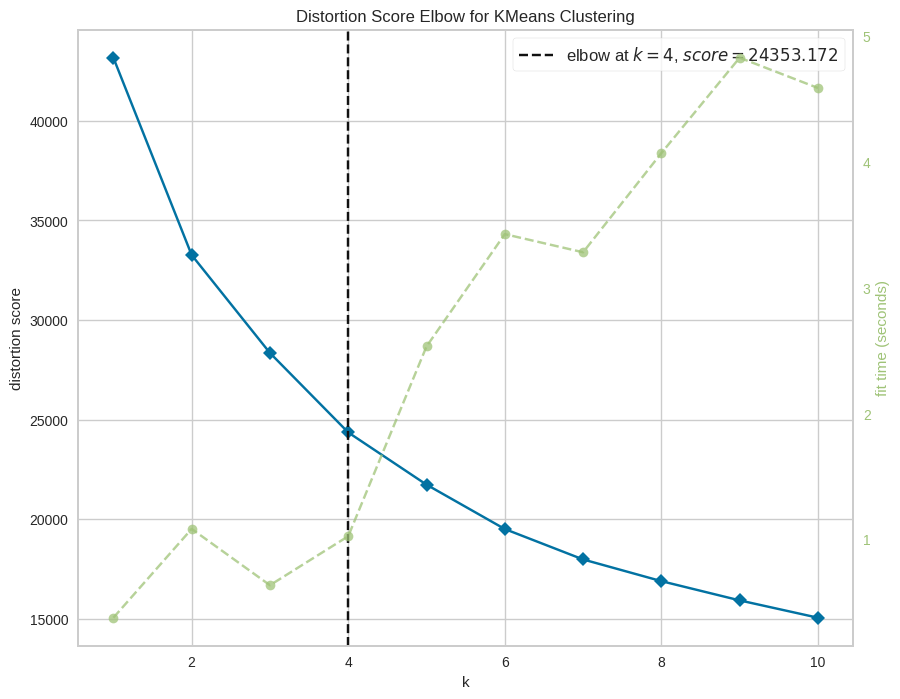

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#metodo del codo
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(X)
visualizer.poof()

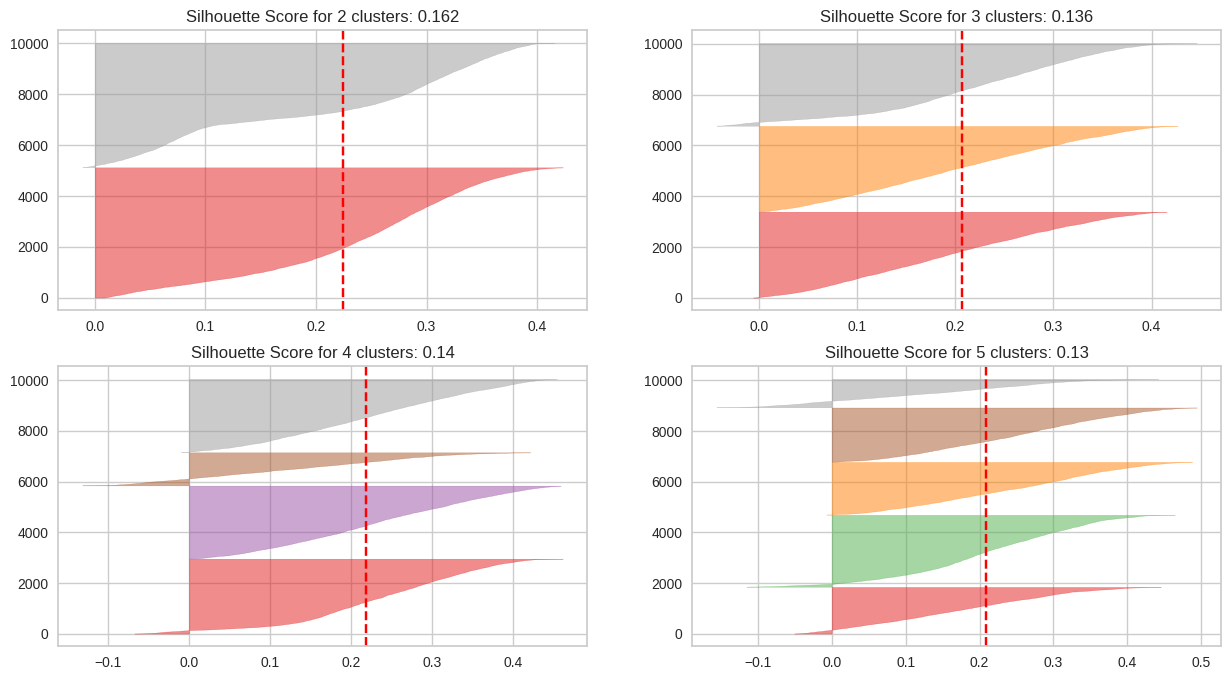

In [ ]:
# Silhouette Scores of PCA Data
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(X)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(pcaData, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)


DADO EL GRAFICO CONSIDERAMOS MEJOR MODELIZACION 4 CLUSTERS

In [ ]:
#entrenamiento del model
modelKM = KMeans(n_clusters = 2)
modelKM.fit(X)

#generacion del clusters
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
1   5133    51.33
0   4867    48.67


Hirarchical Clustering

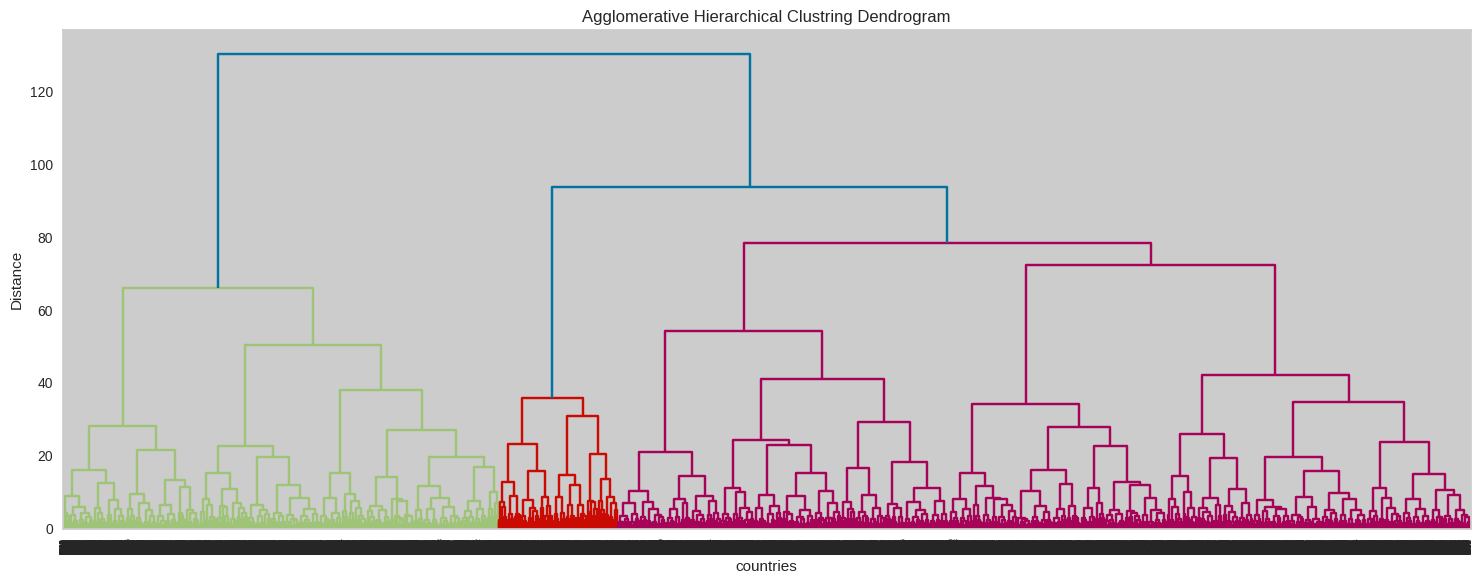

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

link = linkage(X, metric = 'euclidean', method = 'ward')

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agc

modelAGC = agc(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(X)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(), 
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
0   6057    60.57
1   3101    31.01
2    842     8.42


### <u>Hirarchical Clustering Scores</u>:

In [ ]:
from sklearn.metrics import davies_bouldin_score
print('Silhouette Score:', '%.2f'%sil_score(X, sPredAGC))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, sPredAGC))

Silhouette Score: 0.21
Davies Bouldin Score: 1.54


### <u>KMeans Clustering Scores</u>:

In [ ]:
print('Silhouette Score:', '%.2f'%sil_score(X, pcaPredKM))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, pcaPredKM))

Silhouette Score: 0.22
Davies Bouldin Score: 1.72


Dadas las metricas nos quedamos con el KMeans + PCA